# 120 years of Olympic history: athletes and results
[Dataset](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv) This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

### Dataset Content
The file athlete_events contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event. The columns are:
1. **ID** - Unique number for each athlete
2. **Name** - Athlete's name
3. **Sex** - M or F
4. **Age** - Integer
5. **Height** - In centimeters
6. **Weight** - In kilograms
7. **Team** - Team name
8. **NOC** - National Olympic Committee 3-letter code
9. **Games** - Year and season
10. **Year** - Integer
11. **Season** - Summer or Winter
12. **City** - Host city
13. **Sport** - Sport
14. **Event** - Event
15. **Medal** - Gold, Silver, Bronze, or NA

The file noc_regions contains 230 rows and 3 columns.The columns are:
1. **NOC**- National Olympic Committee 3-letter code
2. **Region**- region corresponding to NOCs
3. **Notes**- Extra notes

### Index of Content
1. Importing the Libraries and Dataset
2. Data Cleaning\
    2.1 Null Values in Dataset\
    2.2 'athlete' and 'region' dataset get merged
3. Gender representation in Olympic
4. 'Height' & 'Weight' statistics of athletes
5. Age distribution of athletes
6. Olympic( Games & Countries participation)
7. Sports
8. Events
9. Medals\
    9.1 Olympic Games medal table\
    9.2 Lists of Olympic medalists  
10. India at Olympic\
    10.1 Olympic games & participation of India:\
    10.2 Indian contingent in Olympic Games:\
    10.3 Sports & Events participation:\
    10.4 Medals

### 1. Importing the Libraries and Dataset:

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from wordcloud import WordCloud

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
athlete=pd.read_csv('athlete_events1.csv')
region=pd.read_csv('noc_regions1.csv')

### 2. Data Cleaning:

In [6]:
athlete.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     260416 non-null  float64
 4   Height  210917 non-null  float64
 5   Weight  208204 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.9+ MB


In [7]:
region.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 7.2+ KB


In [8]:
athlete=athlete.set_index('ID')

In [9]:
region=region.drop('notes',axis=1) # 'notes' column of 'region' dataset has only few entries

**2.1 Null Values in Dataset**

In [10]:
athlete.isnull().sum() # Null Values in "athlete" dataset

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

**Note-** 
1. The null values in **'Medal'** column symbolises **'Not Winning a Medal'** that's why it's left as it is.


2. For filling the **null values** in the **'Height'** and **'Weight'** columns, first the athlete are grouped on the basis of their **gender** and **the Event they participated**. Then the null values are filled with **mean** of their individual group.


3. For **'Age'** column, the null values are filled with **mean** on the basis of **gender** only.

In [11]:
wt = athlete.groupby(['Event','Sex'])['Weight'].transform(lambda x: x.mean())
athlete['Weight'] = athlete['Weight'].fillna(wt)

In [12]:
ht = athlete.groupby(['Event','Sex'])['Height'].transform(lambda x: x.mean())
athlete['Height'] = athlete['Height'].fillna(ht)

In [13]:
age = athlete.groupby('Sex')['Age'].transform(lambda x: x.mean())
athlete['Age'] = athlete['Age'].fillna(age)

In [14]:
region.isnull().sum() # null value in 'region' dataset.

NOC       0
region    3
dtype: int64

In [15]:
region[region.isnull().any(axis=1)]

,NOC,region
168,ROT,NaN
208,TUV,NaN
213,UNK,NaN


Null Values in **'region'** dataset is replaced with appropriate data.

In [16]:
region.loc[region['NOC']=='TUV','region']='Tuvalu'
region.loc[region['NOC']=='UNK','region']='Unknown'
region.loc[region['NOC']=='ROT','region']='Refugee Olympic Team'

In [17]:
region.loc[region['region']=='Singapore','NOC']='SGP' #Singapore NOC in region dataset is SIN, but in athlete dataset it is SGP

In [18]:
athlete['City'].replace(to_replace="Athina",value="Athens",inplace=True)

**2.3 'athlete' and 'region' dataset get merged.**

In [19]:
athlete=pd.merge(athlete,region,how='left',on='NOC')

In [20]:
athlete.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,Gunnar Nielsen Aaby,M,24.0,177.480339,73.086644,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [21]:
athlete.info() #The name of final dataset after mergeing is 'athlete'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  268726 non-null  float64
 4   Weight  266135 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
 14  region  271116 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 33.1+ MB


### 3. Gender representation in Olympic:
The first modern Olympic Games to feature female athletes was the 1900 Summer Games in Paris. 23 women competed at the 1900 Summer Games, 2.2% of all the competitors.\
Hélène de Pourtalès of Switzerland became the first woman to compete at the Olympic Games and became the first female Olympic champion, as a member of the winning team in sailing event on May 22, 1900. Briton Charlotte Cooper became the first female individual champion by winning the women's singles tennis competition on July 11.\
Tennis and golf were the only sports where women could compete in individual disciplines. Alongside sailing, golf and tennis, women also competed in croquet.

In [22]:
sex_repr=athlete['Sex'].value_counts()
sex_repr

M    196594
F     74522
Name: Sex, dtype: int64

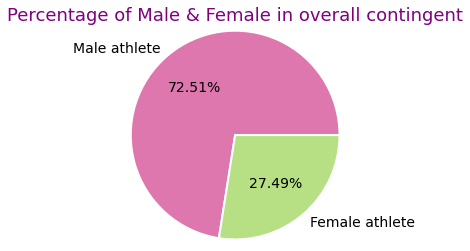

In [23]:
fig, ax = plt.subplots(figsize=(4,4))
colors = plt.get_cmap('PiYG')(np.linspace(0.2, 0.7, len(sex_repr)))
ax.pie(sex_repr,autopct='%1.2f%%',labels=('Male athlete','Female athlete'), radius=1.2, colors=colors,
       wedgeprops={"linewidth": 2, "edgecolor": "white"},textprops={'fontsize':14,'color':'black'})
ax.set_title('Percentage of Male & Female in overall contingent',fontdict={'fontsize':18,'color':'purple'})
plt.show()

In [24]:
# Male, Female & total athletes are grouped by games for summer olympic
summer =athlete[athlete['Season']=='Summer']
df1 = pd.pivot_table(summer, values='Name', index=['Games'],columns=['Sex'], aggfunc=lambda x: len(x.unique()),fill_value=0)

In [25]:
df1['Total athlete']=df1['F']+df1['M']

In [26]:
df1=df1.rename(columns={'F':'Female athlete','M':'Male athlete'})
df1.head()

Sex,Female athlete,Male athlete,Total athlete
Games,,,
1896 Summer,0,176,176
1900 Summer,23,1197,1220
1904 Summer,6,644,650
1906 Summer,6,835,841
1908 Summer,44,1980,2024


In [27]:
# Male, Female & total athletes are grouped by games for winter olympic
winter =athlete[athlete['Season']=='Winter']
df2 = pd.pivot_table(winter, values='Name', index=['Games'],columns=['Sex'], aggfunc=lambda x: len(x.unique()),fill_value=0)

In [28]:
df2['Total athlete']=df2['F']+df2['M']

In [29]:
df2=df2.rename(columns={'F':'Female athlete','M':'Male athlete'})
df2.head()

Sex,Female athlete,Male athlete,Total athlete
Games,,,
1924 Winter,13,300,313
1928 Winter,28,433,461
1932 Winter,21,231,252
1936 Winter,80,588,668
1948 Winter,77,591,668


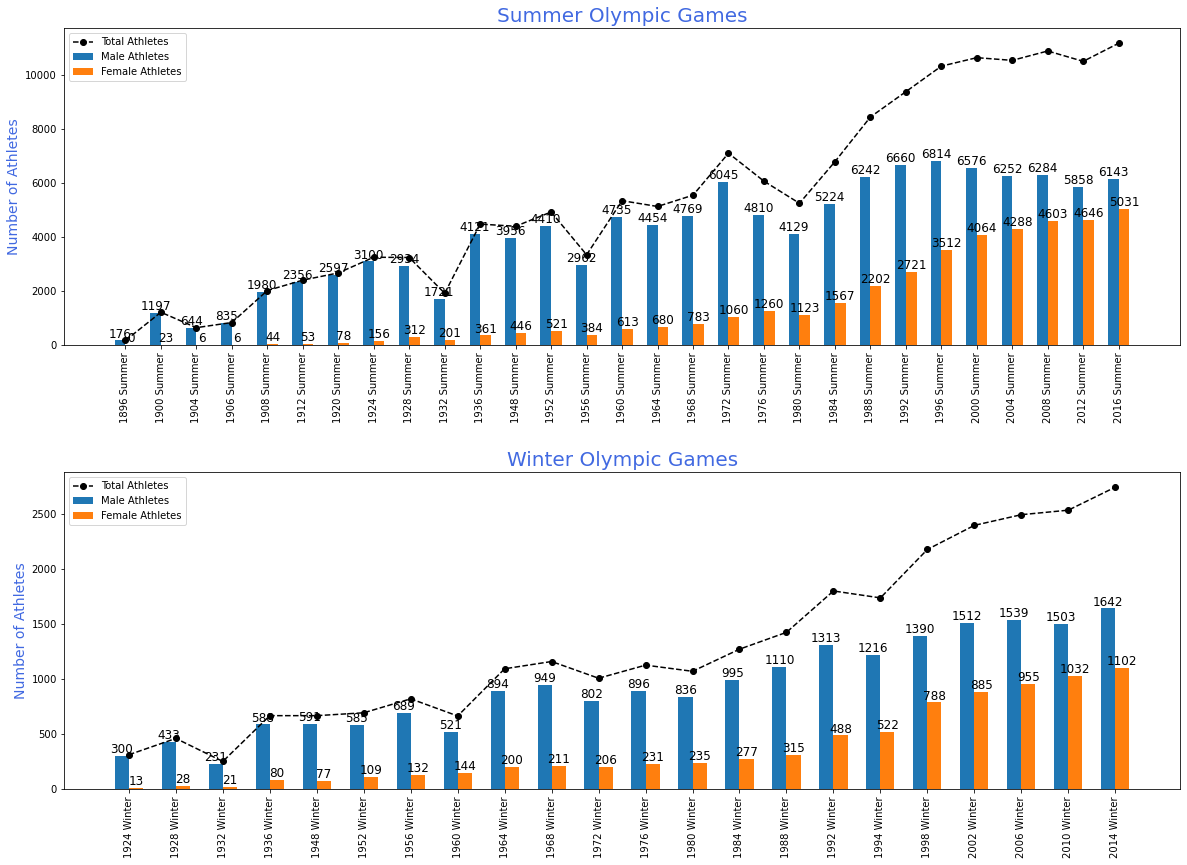

In [30]:
fig,(ax1,ax2)= plt.subplots(nrows = 2, ncols = 1, figsize = (20, 14))
fig.subplots_adjust(hspace = 0.4)

#plot for summer olympic games
ax1.bar(df1.index.values,df1['Male athlete'],width = -.3, align = 'edge', label = 'Male Athletes')
ax1.bar(df1.index.values,df1['Female athlete'], width = .3, align = 'edge', label = 'Female Athletes')
ax1.plot(df1.index.values, df1['Total athlete'], linestyle = '--', color = 'black', label = 'Total Athletes',
        marker = 'o')
ax1.set_xticklabels(df1.index.values,rotation=90)
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(),  '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
ax1.set_title('Summer Olympic Games', size=20, color='royalblue')
ax1.set_ylabel('Number of Athletes', size=14, color='royalblue')
ax1.legend(loc = 'best')

#plot for winter olympic games
ax2.bar(df2.index.values,df2['Male athlete'],width = -.3, align = 'edge', label = 'Male Athletes')
ax2.bar(df2.index.values,df2['Female athlete'], width = .3, align = 'edge', label = 'Female Athletes')
ax2.plot(df2.index.values, df2['Total athlete'], linestyle = '--', color = 'black', label = 'Total Athletes',
        marker = 'o')
ax2.set_xticklabels(df2.index.values,rotation=90)
for b in ax2.patches:
    ax2.text(b.get_x() + b.get_width()/2., b.get_height(),  '%d' % int(b.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
ax2.set_title('Winter Olympic Games', size=20, color='royalblue')
ax2.set_ylabel('Number of Athletes', size=14, color='royalblue')
ax2.legend(loc = 'best')

plt.show()

### 4. 'Height' & 'Weight' statistics of athletes:

In [31]:
athlete[['Height','Weight']].describe()

,Height,Weight
count,268726.000000,266135.000000
mean,175.417694,71.095888
std,9.929132,13.635658
min,127.000000,25.000000
25%,168.000000,62.000000
50%,176.000000,70.000000
75%,182.000000,79.000000
max,226.000000,214.000000


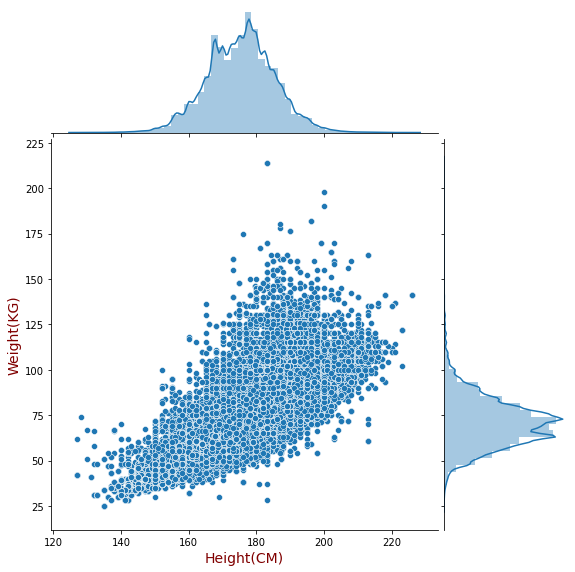

In [32]:
g = sns.JointGrid(x="Height", y="Weight", data=athlete,height=8 ,ratio=3, space=.05)
g = g.plot(sns.scatterplot, sns.distplot,).set_axis_labels(xlabel='Height(CM)', ylabel='Weight(KG)', size=14, color='maroon')

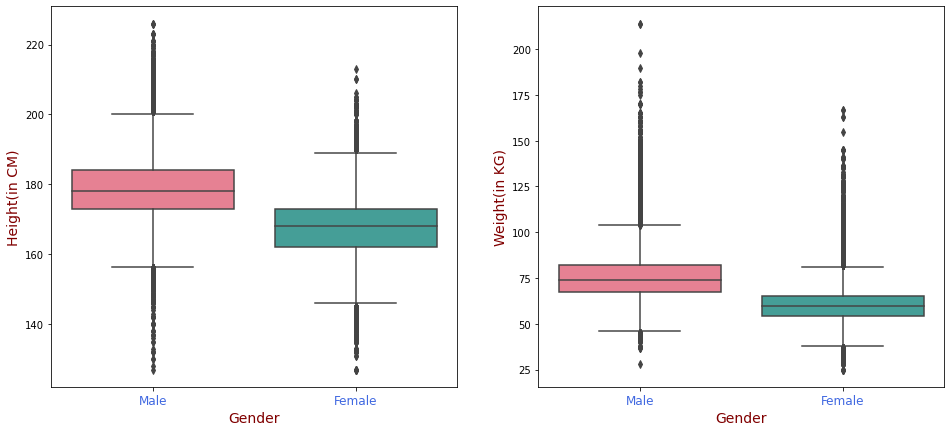

In [33]:
fig,(ax1,ax2)= plt.subplots(nrows = 1, ncols = 2, figsize = (16, 7))

sns.boxplot(y='Height',x='Sex', data=athlete, ax=ax1,palette='husl')
ax1.set_xticklabels(['Male','Female'], size=12, color='royalblue')
ax1.set_xlabel('Gender', size=14, color='maroon')
ax1.set_ylabel('Height(in CM)', size=14, color='maroon')

sns.boxplot(y='Weight',x='Sex', data=athlete, ax=ax2,palette='husl')
ax2.set_xticklabels(['Male','Female'], size=12, color='royalblue')
ax2.set_xlabel('Gender', size=14, color='maroon')
ax2.set_ylabel('Weight(in KG)', size=14, color='maroon')

plt.show()

### 5. Age distribution of athletes:

Age statistics of female athlete
count    74522.000000
mean        23.732881
std          5.778742
min         11.000000
25%         20.000000
50%         23.000000
75%         27.000000
max         74.000000
Name: Age, dtype: float64

Age statistics of male athlete
count    196594.000000
mean         26.277562
std           6.324181
min          10.000000
25%          22.000000
50%          25.000000
75%          29.000000
max          97.000000
Name: Age, dtype: float64


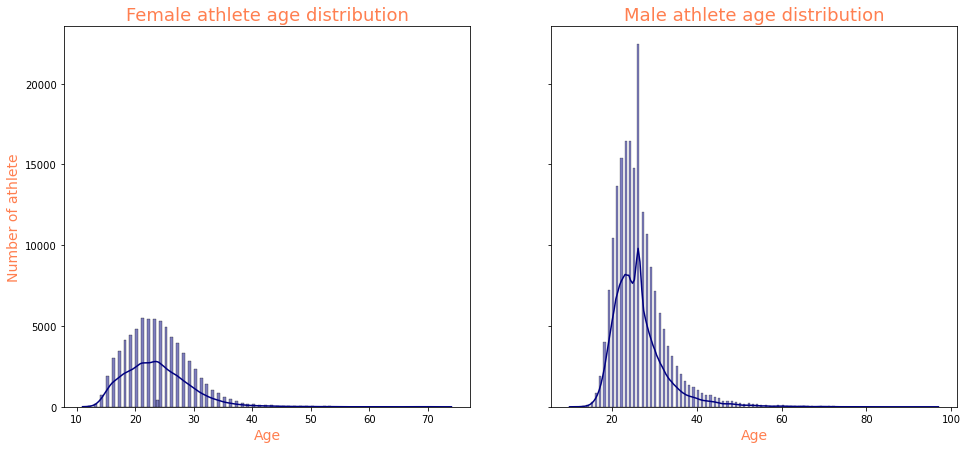

In [34]:
fig,(ax1,ax2)= plt.subplots(nrows = 1, ncols = 2, figsize = (16, 7),sharey = True)

female =athlete[athlete['Sex']=='F']
sns.histplot(female['Age'] ,binwidth=.5,ax=ax1,kde=True,color='navy')
ax1.set_title('Female athlete age distribution', size=18, color='coral')
ax1.set_xlabel('Age', size=14, color='coral')
ax1.set_ylabel('Number of athlete', size=14, color='coral')
             
male =athlete[athlete['Sex']=='M']
sns.histplot(male['Age'] ,binwidth=.5,ax=ax2,kde=True,color='navy')
ax2.set_title('Male athlete age distribution', size=18, color='coral')
ax2.set_xlabel('Age', size=14, color='coral')

print(f"Age statistics of female athlete\n{female['Age'].describe()}\n\nAge statistics of male athlete\n{male['Age'].describe()}")

### 6. Olympic( Games & Countries participation):

In [35]:
print(f'Total number of Olympic Games held between 1896 to 2016= {athlete["Games"].nunique()}')
list_of_games=athlete[['Games','City']].drop_duplicates().dropna().sort_values(by='Games')
list_of_games=list_of_games.set_index('Games').rename_axis('Olympic games').rename(columns={'City':'Host city'})
list_of_games

Total number of Olympic Games held between 1896 to 2016= 51


,Host city
Olympic games,
1896 Summer,Athens
1900 Summer,Paris
1904 Summer,St. Louis
1906 Summer,Athens
1908 Summer,London
1912 Summer,Stockholm
1920 Summer,Antwerpen
1924 Summer,Paris
1924 Winter,Chamonix


**Note- 1906 Intercalated Games:**
The Intercalated Olympic Gamesor were to be a series of *International Olympic Games* halfway between what is now known as the Games of the Olympiad. This proposed series of Games, intercalated in the Olympic Games cycle, was to always be held in **Athens**, and were to have equal status with the international Games. However, the only such Games were held in 1906.\
The Greeks were, despite their best efforts, unable to keep the schedule for 1910. 1914 got even less support before the outbreak of World War I, meaning any further Intercalated Games had to wait until after the war,which ended in 1918.\
Since it had been twelve years since Athens 1906, and in any case, the next possible event would have been in 1922 - sixteen years after the first - the idea of Intercalated Games was given up entirely.\
The medals that were distributed to the participants during these games are not officially recognised by the Olympic Committee and are not displayed with the collection of Olympic medals at the Olympic Museum in Lausanne, Switzerland.

In [36]:
countries_participation=athlete[['Games','NOC']].groupby(['Games'],as_index=False).nunique().sort_values(by='Games')
countries_participation.rename(columns={'NOC':'Number of countries participated'},inplace=True)
countries_participation.head()

,Games,Number of countries participated
0,1896 Summer,12
1,1900 Summer,31
2,1904 Summer,15
3,1906 Summer,21
4,1908 Summer,22


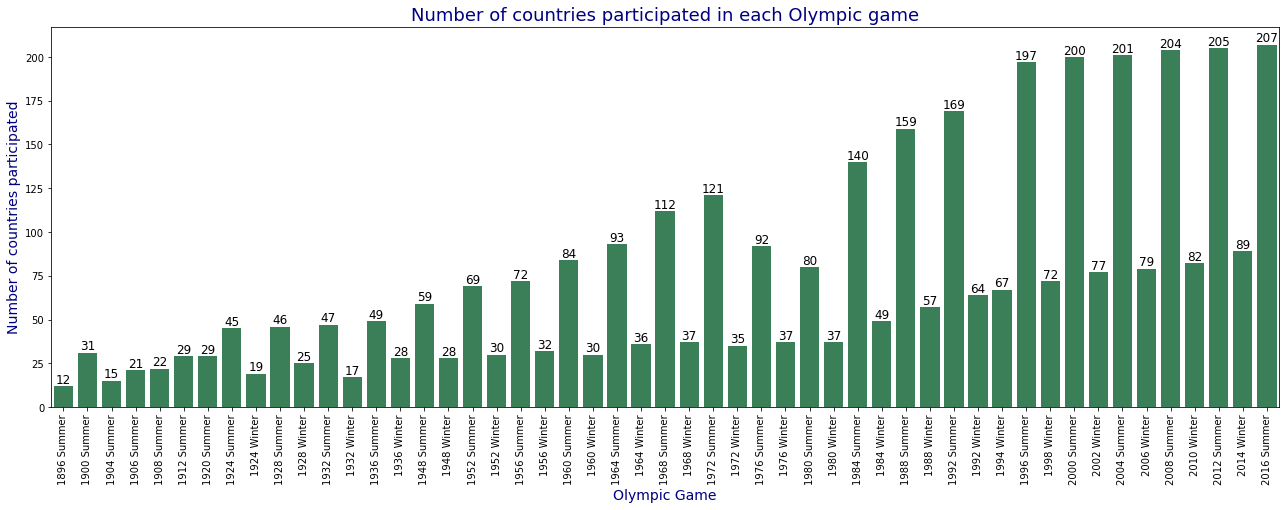

In [37]:
fig, ax = plt.subplots(figsize=(22,7))
sns.barplot(x='Games', y='Number of countries participated', data=countries_participation, ax=ax, color='seagreen')
ax.set_xticklabels(labels=countries_participation['Games'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Game', size=14, color='navy')
ax.set_ylabel('Number of countries participated', size=14, color='navy')
ax.set_title('Number of countries participated in each Olympic game', size=18, color='navy')

plt.show()

In [38]:
print("countries participated in every Olympic game since 1896")
max_participation=athlete[['Games','region']].groupby(['region'],as_index=False).nunique()
max_participation[max_participation['Games']==max_participation['Games'].max()]

countries participated in every Olympic game since 1896


,region,Games
63,France,51
87,Italy,51
179,Switzerland,51
193,UK,51


In [39]:
print("countries participated in fewer Olympic game till 2016")
min_participation=athlete[['Games','region']].groupby(['region'],as_index=False).nunique()
min_participation[min_participation['Games']==min_participation['Games'].min()]

countries participated in fewer Olympic game till 2016


,region,Games
95,Kosovo,1
149,Refugee Olympic Team,1
172,South Sudan,1
198,Unknown,1


### 7. Sports:

In [40]:
sport_cloud=athlete['Sport'].value_counts()

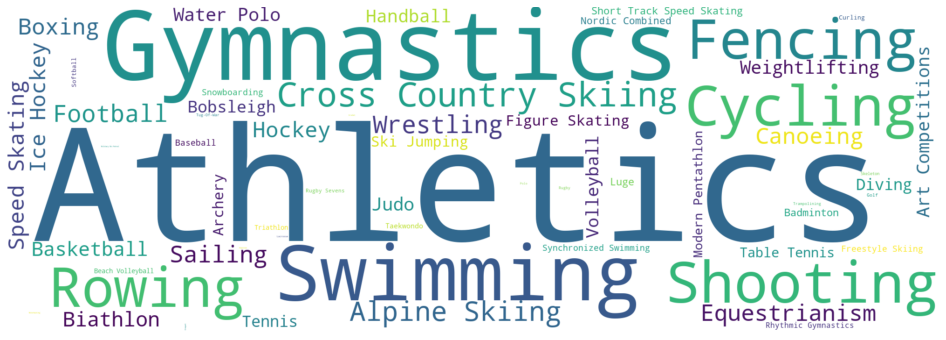

In [41]:
wordcloud = WordCloud( width=2000,height=700,normalize_plurals=False,repeat=False,background_color='white')

wordcloud.generate_from_frequencies(frequencies = sport_cloud)
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [42]:
summer_games = athlete[athlete['Season']=='Summer'].pivot_table(athlete, index=['Games'], 
                                                  aggfunc=lambda x: len(x.unique())).reset_index()[['Games','Sport']]
winter_games = athlete[athlete['Season']=='Winter'].pivot_table(athlete, index=['Games'], 
                                                  aggfunc=lambda x: len(x.unique())).reset_index()[['Games','Sport']]

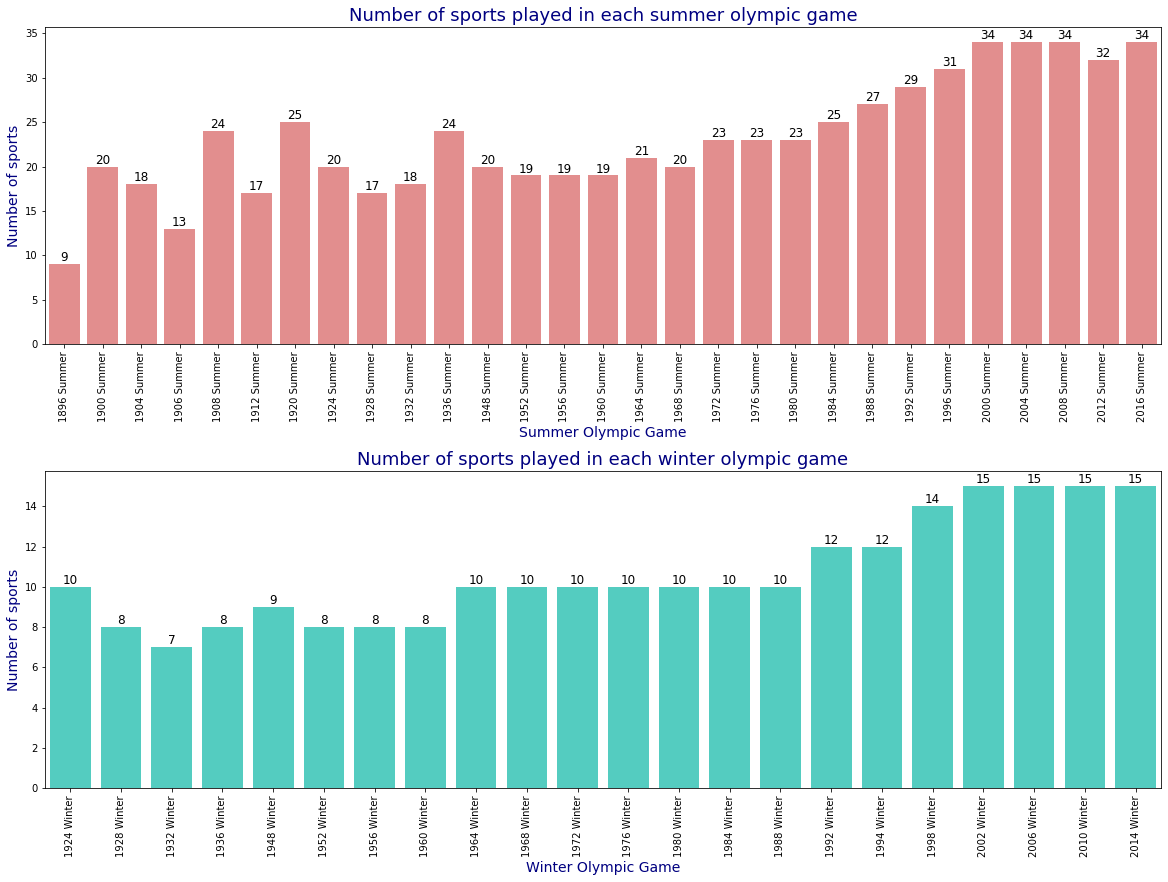

In [43]:
fig,(ax1,ax2)= plt.subplots(nrows = 2, ncols = 1, figsize = (20, 14))
fig.subplots_adjust(hspace = 0.4)

sns.barplot(x='Games', y='Sport', data=summer_games, ax=ax1, color='lightcoral')
ax1.set_xticklabels(labels=summer_games['Games'],rotation=90)

for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax1.set_xlabel('Summer Olympic Game', size=14, color='navy')
ax1.set_ylabel('Number of sports', size=14, color='navy')
ax1.set_title('Number of sports played in each summer olympic game', size=18, color='navy')

sns.barplot(x='Games', y='Sport', data=winter_games, ax=ax2, color='turquoise')
ax2.set_xticklabels(labels=winter_games['Games'],rotation=90)

for p in ax2.patches:
    ax2.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax2.set_xlabel('Winter Olympic Game', size=14, color='navy')
ax2.set_ylabel('Number of sports', size=14, color='navy')
ax2.set_title('Number of sports played in each winter olympic game', size=18, color='navy')

plt.show()

In [44]:
print(f'Total number of sports which are part of Summer Olympic Games since 1896 = {summer["Sport"].nunique()}')
sport_list_summer=athlete[athlete['Season']=='Summer'][['Games','Sport']].groupby(['Sport'],as_index=False).nunique().sort_values(by='Games',ascending=False)
sport_list_summer=sport_list_summer.rename(columns={'Sport':'List of sport in summer games','Games':'Number of olympic games'})
sport_list_summer=sport_list_summer.set_index('List of sport in summer games')
sport_list_summer

Total number of sports which are part of Summer Olympic Games since 1896 = 52


,Number of olympic games
List of sport in summer games,
Gymnastics,29
Swimming,29
Fencing,29
Athletics,29
Cycling,29
Rowing,28
Wrestling,28
Shooting,27
Water Polo,27


In [45]:
print("Sport played in maximun summer olympic")
sport_list_summer[sport_list_summer['Number of olympic games']==sport_list_summer['Number of olympic games'].max()]

Sport played in maximun summer olympic


,Number of olympic games
List of sport in summer games,
Gymnastics,29
Swimming,29
Fencing,29
Athletics,29
Cycling,29


In [46]:
print("Sport played in fewer summer olympic")
sport_list_summer[sport_list_summer['Number of olympic games']==sport_list_summer['Number of olympic games'].min()]

Sport played in fewer summer olympic


,Number of olympic games
List of sport in summer games,
Basque Pelota,1
Croquet,1
Cricket,1
Ice Hockey,1
Rugby Sevens,1
Roque,1
Racquets,1
Motorboating,1
Jeu De Paume,1


In [47]:
print(f'Total number of sports which are part of Winter Olympic Games = {winter["Sport"].nunique()}')
sport_list_winter=athlete[athlete['Season']=='Winter'][['Games','Sport']].groupby(['Sport'],as_index=False).nunique().sort_values(by='Games',ascending=False)
sport_list_winter=sport_list_winter.rename(columns={'Sport':'List of sport in winter games','Games':'Number of olympic games'})
sport_list_winter=sport_list_winter.set_index('List of sport in winter games')
sport_list_winter

Total number of sports which are part of Winter Olympic Games = 17


,Number of olympic games
List of sport in winter games,
Ice Hockey,22
Figure Skating,22
Ski Jumping,22
Nordic Combined,22
Speed Skating,22
Cross Country Skiing,22
Bobsleigh,21
Alpine Skiing,19
Biathlon,15


In [48]:
print("Sport played in maximum winter olympic")
sport_list_winter[sport_list_winter['Number of olympic games']==sport_list_winter['Number of olympic games'].max()]

Sport played in maximum winter olympic


,Number of olympic games
List of sport in winter games,
Ice Hockey,22
Figure Skating,22
Ski Jumping,22
Nordic Combined,22
Speed Skating,22
Cross Country Skiing,22


In [49]:
print("Sport played in fewer winter olympic")
sport_list_winter[sport_list_winter['Number of olympic games']==sport_list_winter['Number of olympic games'].min()]

Sport played in fewer winter olympic


,Number of olympic games
List of sport in winter games,
Alpinism,1
Military Ski Patrol,1


### 8. Events:

In [50]:
print('List of events in summer games that have played in any olympic.')
pd.DataFrame(summer['Event'].unique(),columns=['List of event'])

List of events in summer games that have played in any olympic.


,List of event
0,Basketball Men's Basketball
1,Judo Men's Extra-Lightweight
2,Football Men's Football
3,Tug-Of-War Men's Tug-Of-War
4,Athletics Women's 100 metres
...,...
646,Weightlifting Men's All-Around Dumbbell Contest
647,"Archery Men's Au Chapelet, 33 metres"
648,"Archery Men's Au Cordon Dore, 33 metres"
649,"Archery Men's Target Archery, 28 metres, Indiv..."


In [51]:
print('List of events in winter games that have played in any olympic.')
pd.DataFrame(winter['Event'].unique(),columns=['List of event'])

List of events in winter games that have played in any olympic.


,List of event
0,Speed Skating Women's 500 metres
1,"Speed Skating Women's 1,000 metres"
2,Cross Country Skiing Men's 10 kilometres
3,Cross Country Skiing Men's 50 kilometres
4,Cross Country Skiing Men's 10/15 kilometres Pu...
...,...
114,Freestyle Skiing Men's Halfpipe
115,Snowboarding Women's Parallel Giant Slalom
116,Speed Skating Men's Allround
117,Snowboarding Women's Parallel Slalom


In [52]:
summer_event = athlete[athlete['Season']=='Summer'].pivot_table(athlete, index=['Games'], 
                                                  aggfunc=lambda x: len(x.unique())).reset_index()[['Games','Event']]
winter_event = athlete[athlete['Season']=='Winter'].pivot_table(athlete, index=['Games'], 
                                                  aggfunc=lambda x: len(x.unique())).reset_index()[['Games','Event']]

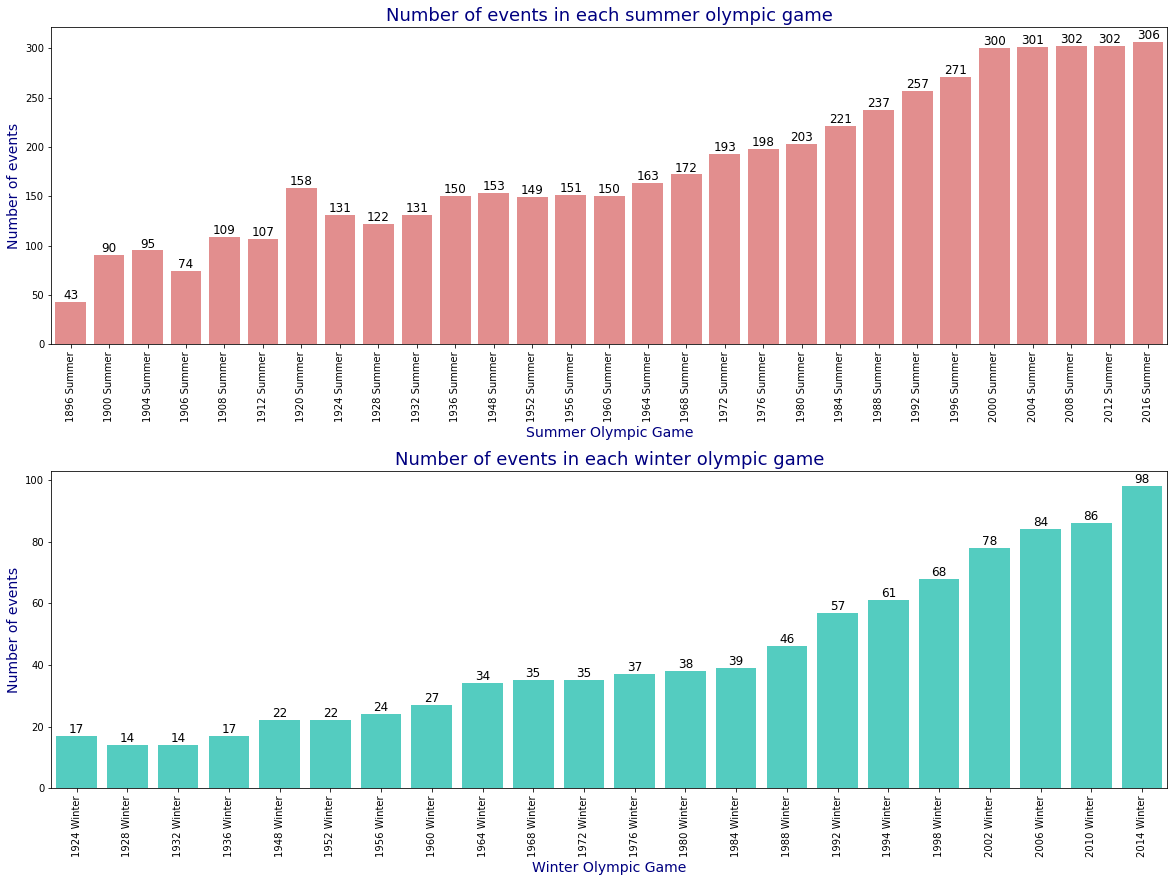

In [53]:
fig,(ax1,ax2)= plt.subplots(nrows = 2, ncols = 1, figsize = (20, 14))
fig.subplots_adjust(hspace = 0.4)

sns.barplot(x='Games', y='Event', data=summer_event, ax=ax1, color='lightcoral')
ax1.set_xticklabels(labels=summer_event['Games'],rotation=90)

for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax1.set_xlabel('Summer Olympic Game', size=14, color='navy')
ax1.set_ylabel('Number of events', size=14, color='navy')
ax1.set_title('Number of events in each summer olympic game', size=18, color='navy')

sns.barplot(x='Games', y='Event', data=winter_event, ax=ax2, color='turquoise')
ax2.set_xticklabels(labels=winter_event['Games'],rotation=90)

for p in ax2.patches:
    ax2.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax2.set_xlabel('Winter Olympic Game', size=14, color='navy')
ax2.set_ylabel('Number of events', size=14, color='navy')
ax2.set_title('Number of events in each winter olympic game', size=18, color='navy')

plt.show()

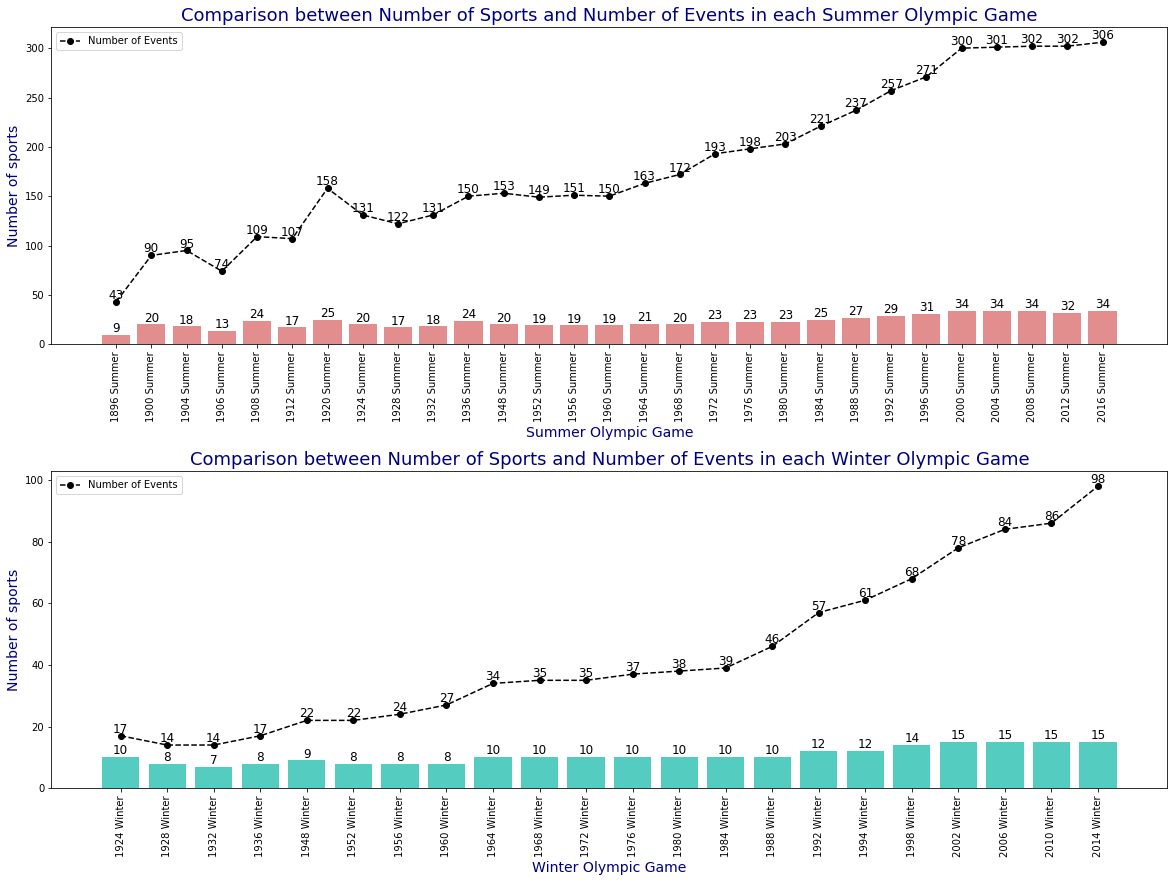

In [54]:
fig,(ax1,ax2)= plt.subplots(nrows = 2, ncols = 1, figsize = (20, 14))
fig.subplots_adjust(hspace = 0.4)

sns.barplot(x='Games', y='Sport', data=summer_games, ax=ax1, color='lightcoral')
ax1.set_xticklabels(labels=summer_games['Games'],rotation=90)
ax1.plot(summer_event.index.values, summer_event['Event'], linestyle = '--', color = 'black', label = 'Number of Events',
        marker = 'o')
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
for i,j in zip(summer_event.index.values, summer_event['Event']):
    ax1.annotate(str(j),xy=(i,j), color='black',fontsize=12, ha='center', va='bottom')   

ax1.set_xlabel('Summer Olympic Game', size=14, color='navy')
ax1.set_ylabel('Number of sports', size=14, color='navy')
ax1.set_title('Comparison between Number of Sports and Number of Events in each Summer Olympic Game',size=18, color='navy')
ax1.legend(loc = 'best')

sns.barplot(x='Games', y='Sport', data=winter_games, ax=ax2, color='turquoise')
ax2.set_xticklabels(labels=winter_games['Games'],rotation=90)
ax2.plot(winter_event.index.values, winter_event['Event'], linestyle = '--', color = 'black', label = 'Number of Events',
        marker = 'o')
for p in ax2.patches:
    ax2.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
for i,j in zip(winter_event.index.values, winter_event['Event']):
    ax2.annotate(str(j),xy=(i,j), color='black',fontsize=12, ha='center', va='bottom')   

ax2.set_xlabel('Winter Olympic Game', size=14, color='navy')
ax2.set_ylabel('Number of sports', size=14, color='navy')
ax2.set_title('Comparison between Number of Sports and Number of Events in each Winter Olympic Game',size=18, color='navy')
ax2.legend(loc = 'best')

plt.show()

### 9. Medals:

An **Olympic medal** is awarded to successful competitors at one of the Olympic Games. There are three classes of medal to be won: **gold, silver**, and **bronze**, awarded to first, second, and third place, respectively.

#### 9.1 Olympic Games medal table:

In [55]:
table =pd.pivot_table(athlete,values='Name',index=['region'],columns=['Medal'],aggfunc=lambda x: len(x.unique()),fill_value=0)
table.sort_values(by='Gold',ascending=False).head(10)

Medal,Bronze,Gold,Silver
region,,,
USA,1235,1919,1439
Russia,1039,1205,977
Germany,1116,996,1009
UK,601,563,664
Italy,466,453,449
France,600,407,531
Sweden,464,394,446
Canada,404,383,398
Hungary,321,301,271


**NOTE-** In the above table we are counting the number of individual athletes who won the medels. This is different from the list of countries having total medals, It's because the sports which are played in team i.e. hockey every athlete got a medal.

#### Summer Olympic Games

In [56]:
# 'summer' dataset represents "athlete['Season']=='Summer'"
gold_summer = pd.pivot_table(summer[summer.Medal=='Gold'], values='Event', index=['region'],
                    columns=['Year'], aggfunc=lambda x: len(x.unique()),fill_value=0)
silver_summer = pd.pivot_table(summer[summer.Medal=='Silver'], values='Event', index=['region'],
                    columns=['Year'], aggfunc=lambda x: len(x.unique()),fill_value=0)
bronze_summer = pd.pivot_table(summer[summer.Medal=='Bronze'], values='Event', index=['region'],
                    columns=['Year'], aggfunc=lambda x: len(x.unique()),fill_value=0)

In [57]:
df_gold=pd.DataFrame(gold_summer.sum(axis=1)).rename(columns={0:'Gold Medal'})
df_silver=pd.DataFrame(silver_summer.sum(axis=1)).rename(columns={0:'Silver Medal'})
df_bronze=pd.DataFrame(bronze_summer.sum(axis=1)).rename(columns={0:'Bronze Medal'})

In [58]:
medal_summer=df_gold.merge(df_silver,on='region',how='outer').merge(df_bronze,on='region',how='outer')

In [59]:
medal_summer=medal_summer.fillna(0).astype(int) # null values are replaced by 0, and the dataset is converted to int from float

In [60]:
medal_summer['Total Medal']=medal_summer['Gold Medal']+medal_summer['Silver Medal']+medal_summer['Bronze Medal']

In [61]:
medal_summer.sort_values(by='Gold Medal',ascending=False).head(10)

,Gold Medal,Silver Medal,Bronze Medal,Total Medal
region,,,,
USA,1035,802,707,2544
Russia,592,498,487,1577
Germany,442,457,490,1389
UK,278,316,298,892
France,233,255,282,770
China,228,163,154,545
Italy,219,191,198,608
Hungary,178,154,172,504
Australia,150,171,197,518


In [62]:
top20_summer=medal_summer.nlargest(20,columns='Gold Medal') # Top 20 medal winner country

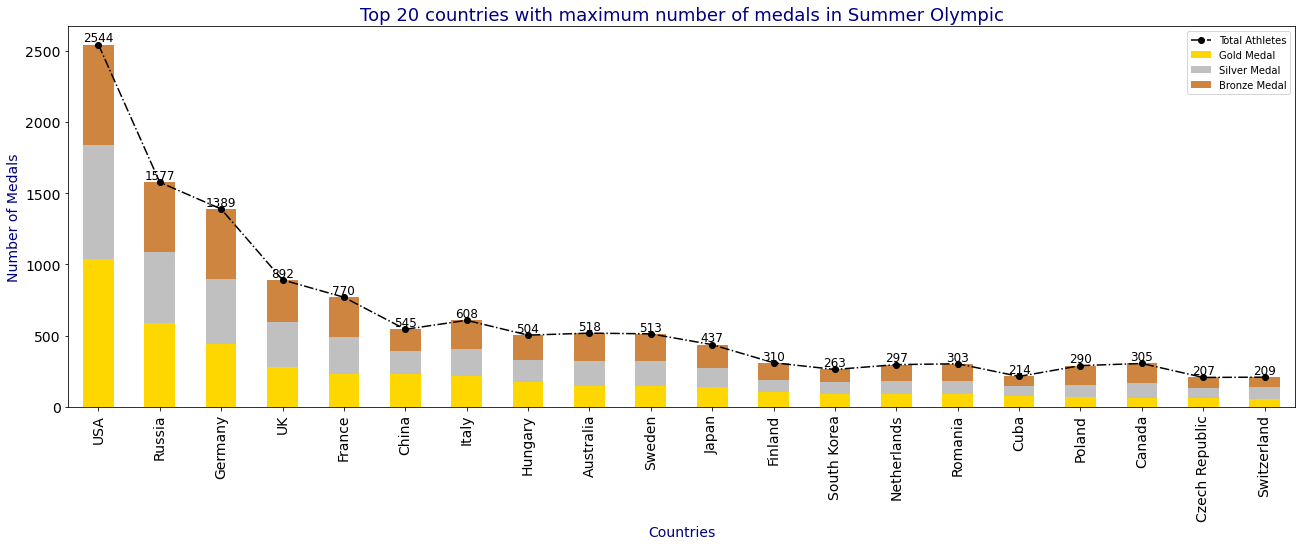

In [63]:
fig, ax = plt.subplots(figsize=(22,7))

top20_summer[['Gold Medal','Silver Medal','Bronze Medal']].plot(kind='bar', stacked=True, 
                                                                 color=['gold', 'silver', 'peru'],ax=ax,fontsize=14)
ax.plot(top20_summer.index.values, top20_summer['Total Medal'], linestyle = '-.', color = 'black',
        label = 'Total Athletes',marker = 'o')

for i,j in zip(top20_summer.index.values, top20_summer['Total Medal']):
    ax.annotate(str(j),xy=(i,j), color='black',fontsize=12, ha='center', va='bottom')
    
ax.set_xlabel('Countries', size=14, color='navy')
ax.set_ylabel('Number of Medals', size=14, color='navy')
ax.set_title('Top 20 countries with maximum number of medals in Summer Olympic', size=18, color='navy')
ax.legend(loc = 'best',)

plt.show()

#### Winter Olympic Games

In [64]:
# 'winter' dataset represents "athlete['Season']=='Winter'"
gold_winter = pd.pivot_table(winter[winter.Medal=='Gold'], values='Event', index=['region'],
                    columns=['Year'], aggfunc=lambda x: len(x.unique()),fill_value=0)
silver_winter = pd.pivot_table(winter[winter.Medal=='Silver'], values='Event', index=['region'],
                    columns=['Year'], aggfunc=lambda x: len(x.unique()),fill_value=0)
bronze_winter = pd.pivot_table(winter[winter.Medal=='Bronze'], values='Event', index=['region'],
                    columns=['Year'], aggfunc=lambda x: len(x.unique()),fill_value=0)

In [65]:
df1_gold=pd.DataFrame(gold_winter.sum(axis=1)).rename(columns={0:'Gold Medal'})
df1_silver=pd.DataFrame(silver_winter.sum(axis=1)).rename(columns={0:'Silver Medal'})
df1_bronze=pd.DataFrame(bronze_winter.sum(axis=1)).rename(columns={0:'Bronze Medal'})

In [66]:
medal_winter=df1_gold.merge(df1_silver,on='region',how='outer').merge(df1_bronze,on='region',how='outer')

In [67]:
medal_winter=medal_winter.fillna(0).astype(int) # null values are replaced by 0, and the dataset is converted to int from float

In [68]:
medal_winter['Total Medal']=medal_winter['Gold Medal']+medal_winter['Silver Medal']+medal_winter['Bronze Medal']

In [69]:
medal_winter.sort_values(by='Gold Medal',ascending=False).head(10)

,Gold Medal,Silver Medal,Bronze Medal,Total Medal
region,,,,
Germany,136,135,106,377
Russia,135,102,102,339
Norway,111,108,100,319
USA,96,99,84,279
Canada,62,56,52,170
Austria,59,78,81,218
Sweden,50,40,54,144
Switzerland,50,40,47,137
Finland,42,62,57,161


In [70]:
top20_winter=medal_winter.nlargest(20,columns='Gold Medal') # Top 20 medal winner country

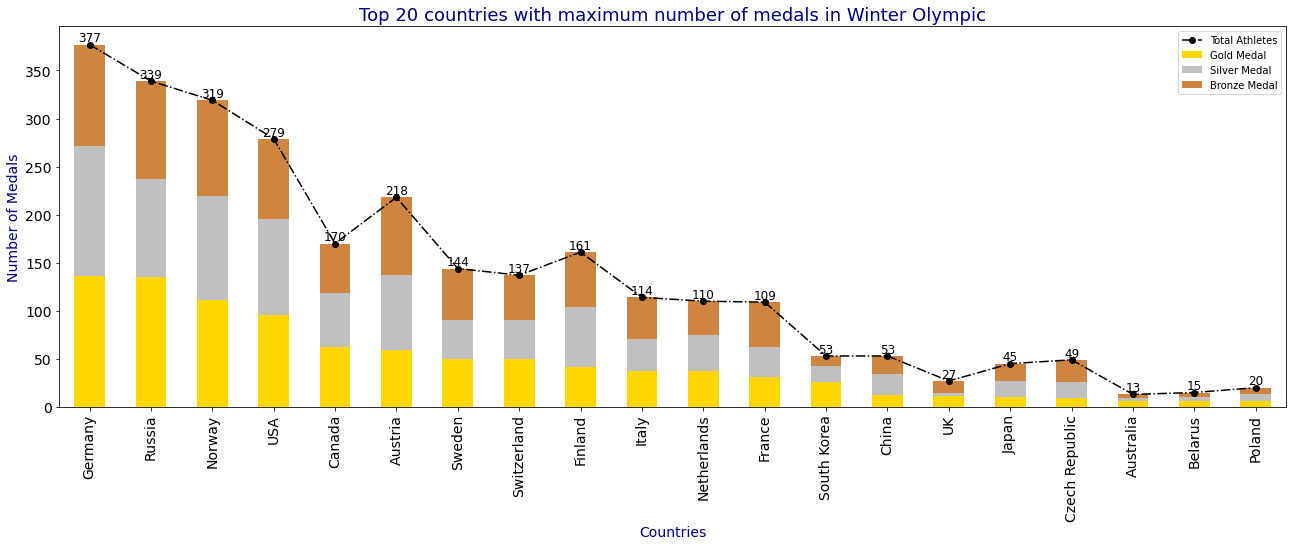

In [71]:
fig, ax = plt.subplots(figsize=(22,7))

top20_winter[['Gold Medal','Silver Medal','Bronze Medal']].plot(kind='bar', stacked=True, 
                                                                 color=['gold', 'silver', 'peru'],ax=ax,fontsize=14)
ax.plot(top20_winter.index.values, top20_winter['Total Medal'], linestyle = '-.', color = 'black',
        label = 'Total Athletes',marker = 'o')

for i,j in zip(top20_winter.index.values, top20_winter['Total Medal']):
    ax.annotate(str(j),xy=(i,j), color='black',fontsize=12, ha='center', va='bottom')
    
ax.set_xlabel('Countries', size=14, color='navy')
ax.set_ylabel('Number of Medals', size=14, color='navy')
ax.set_title('Top 20 countries with maximum number of medals in Winter Olympic', size=18, color='navy')
ax.legend(loc = 'best',)

plt.show()

#### 9.2 Lists of Olympic medalists:

In [72]:
athlete_cloud=athlete[athlete['Medal']=='Gold']['Name'].value_counts()

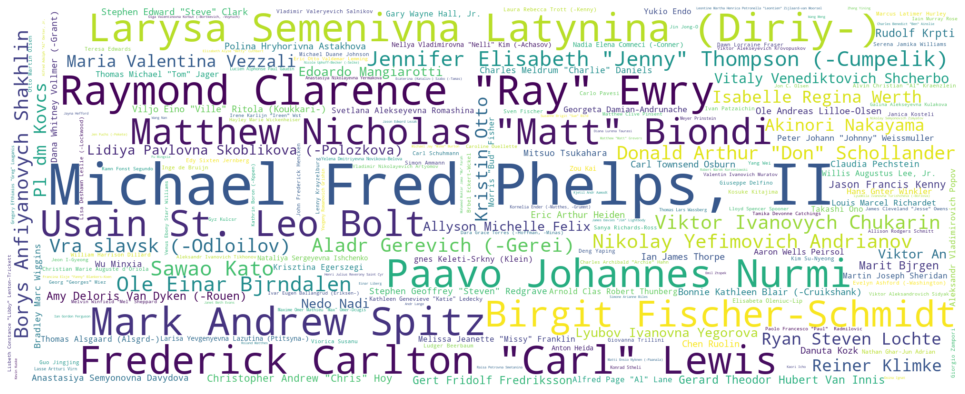

In [73]:
wordcloud = WordCloud( width=2000,height=800,normalize_plurals=False,repeat=False,background_color='white')

wordcloud.generate_from_frequencies(frequencies = athlete_cloud)
plt.figure(figsize=(20,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [74]:
male= athlete[athlete['Sex']=='M']
gold_male=male[male['Medal']=='Gold'].groupby('Name')['Medal'].count().reset_index().rename(columns={'Medal':'Gold Medal'})

In [75]:
print('List of top 10 Male athlete having maximum number of Gold Medals ')
gold_male.nlargest(10,columns='Gold Medal')

List of top 10 Male athlete having maximum number of Gold Medals 


,Name,Gold Medal
4917,"Michael Fred Phelps, II",23
5825,"Raymond Clarence ""Ray"" Ewry",10
2203,"Frederick Carlton ""Carl"" Lewis",9
4700,Mark Andrew Spitz,9
5447,Paavo Johannes Nurmi,9
4814,"Matthew Nicholas ""Matt"" Biondi",8
5329,Ole Einar Bjrndalen,8
6264,Sawao Kato,8
6904,Usain St. Leo Bolt,8
73,Aladr Gerevich (-Gerei),7


In [76]:
female= athlete[athlete['Sex']=='F']
gold_female=female[female['Medal']=='Gold'].groupby('Name')['Medal'].count().reset_index().rename(columns={'Medal':'Gold Medal'})

In [77]:
print('List of top 10 Female athlete having maximum number of Gold Medals ')
gold_female.nlargest(10,columns='Gold Medal')

List of top 10 Female athlete having maximum number of Gold Medals 


,Name,Gold Medal
1301,Larysa Semenivna Latynina (Diriy-),9
258,Birgit Fischer-Schmidt,8
1020,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",8
2497,Vra slavsk (-Odloilov),7
60,Allyson Michelle Felix,6
73,Amy Deloris Van Dyken (-Rouen),6
968,Isabelle Regina Werth,6
1268,Kristin Otto,6
1373,Lidiya Pavlovna Skoblikova (-Polozkova),6
1470,Lyubov Ivanovna Yegorova,6


In [78]:
total_male=male[male['Medal'].notnull()].groupby('Name')['Medal'].count().reset_index().rename(columns={'Medal':'Total Medal'})

In [79]:
print('List of top 10 Male athlete having maximum number of Medals(includes Gold, Silver and Bronze)')
total_male.nlargest(10,columns='Total Medal')

List of top 10 Male athlete having maximum number of Medals(includes Gold, Silver and Bronze)


,Name,Total Medal
13295,"Michael Fred Phelps, II",28
14130,Nikolay Yefimovich Andrianov,15
2399,Borys Anfiyanovych Shakhlin,13
4470,Edoardo Mangiarotti,13
14349,Ole Einar Bjrndalen,13
17963,Takashi Ono,13
635,Aleksey Yuryevich Nemov,12
14660,Paavo Johannes Nurmi,12
16806,Ryan Steven Lochte,12
16986,Sawao Kato,12


In [80]:
total_female=female[female['Medal'].notnull()].groupby('Name')['Medal'].count().reset_index().rename(columns={'Medal':'Total Medal'})

In [81]:
print('List of top 10 Female athlete having maximum number of Medals(includes Gold, Silver and Bronze)')
total_female.nlargest(10,columns='Total Medal')

List of top 10 Female athlete having maximum number of Medals(includes Gold, Silver and Bronze)


,Name,Total Medal
3672,Larysa Semenivna Latynina (Diriy-),18
772,Birgit Fischer-Schmidt,12
1393,"Dara Grace Torres (-Hoffman, -Minas)",12
2896,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12
5054,Natalie Anne Coughlin (-Hall),12
6893,Vra slavsk (-Odloilov),11
2001,Franziska van Almsick,10
2726,Isabelle Regina Werth,10
4520,Marit Bjrgen,10
5591,Polina Hryhorivna Astakhova,10


### 10. India at Olympic:

Despite being under British rule until 1947, India participated in the Olympic Games separately from the British Olympic Team.
India first participated at the Olympic Games in **1900**, with a lone athlete **Norman Pritchard** winning two medals – both *silver* – in athletics and became the first Asian nation to win an Olympic medal. 
The nation first sent a team to the Summer Olympic Games in **1920** and has participated in every Summer Games since then. India has also competed at several *Winter Olympic Games* beginning in **1964**.

In [82]:
india = athlete[athlete['region']=='India']

#### 10.1 Olympic games & participation of India:

In [83]:
print(f"Number of Olympic Games in which India participated= {india['Games'].nunique()}")
pd.DataFrame(india['Games'].unique(),columns=['List of games']).head()

Number of Olympic Games in which India participated= 34


,List of games
0,1928 Summer
1,1984 Summer
2,1988 Summer
3,1992 Summer
4,1996 Summer


In [84]:
print(f"Number of Summer Olympic Games in which India participated= {india[india['Season']=='Summer']['Games'].nunique()}")
print('\n')
print(f"Number of Winter Olympic Games in which India participated= {india[india['Season']=='Winter']['Games'].nunique()}")

Number of Summer Olympic Games in which India participated= 24


Number of Winter Olympic Games in which India participated= 10


#### 10.2 Indian contingent in Olympic Games:

In [85]:
india['Sex'].value_counts()

M    1167
F     241
Name: Sex, dtype: int64

In [86]:
team_india=pd.pivot_table(india, values='Name', index=['Games'],columns=['Sex'], aggfunc=lambda x: len(x.unique()),fill_value=0)

In [87]:
team_india['Total athlete']=team_india['M']+team_india['F']

In [88]:
team_india=team_india.rename(columns={'F':'Female athlete','M':'Male athlete'})

In [89]:
team_india.head(10)

Sex,Female athlete,Male athlete,Total athlete
Games,,,
1900 Summer,0,1,1
1920 Summer,0,5,5
1924 Summer,1,12,13
1924 Winter,0,7,7
1928 Summer,0,21,21
1932 Summer,0,19,19
1936 Summer,0,27,27
1948 Summer,0,79,79
1952 Summer,4,60,64


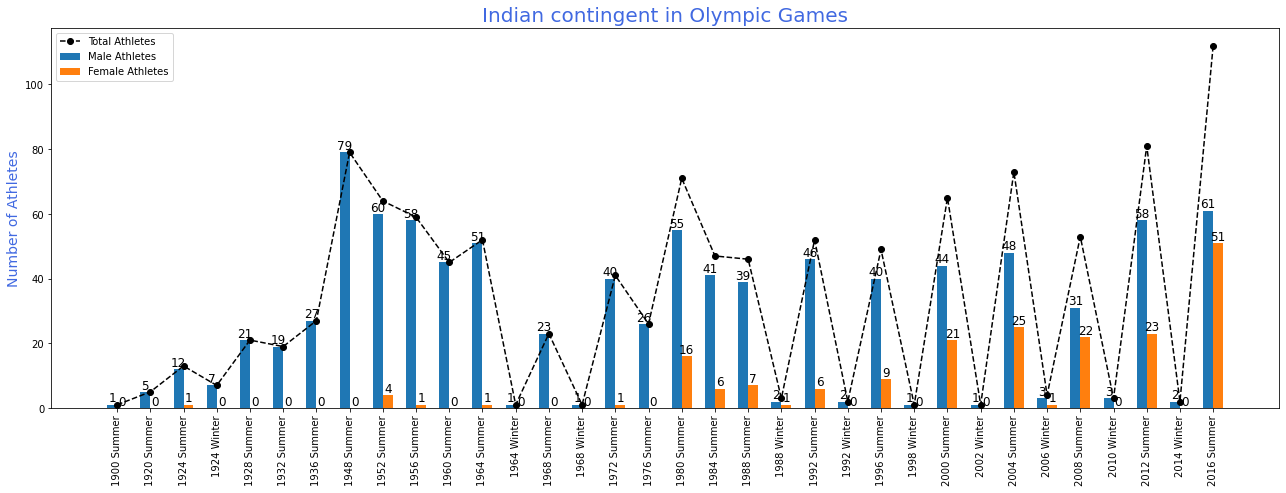

In [90]:
fig, ax = plt.subplots(figsize=(22,7))

ax.bar(team_india.index.values,team_india['Male athlete'],width = -.3, align = 'edge', label = 'Male Athletes')
ax.bar(team_india.index.values,team_india['Female athlete'], width = .3, align = 'edge', label = 'Female Athletes')
ax.plot(team_india.index.values, team_india['Total athlete'], linestyle = '--', color = 'black', label = 'Total Athletes',
        marker = 'o')
ax.set_xticklabels(team_india.index.values,rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
ax.set_title('Indian contingent in Olympic Games', size=20, color='royalblue')
ax.set_ylabel('Number of Athletes', size=14, color='royalblue')
ax.legend(loc = 'best')

plt.show()

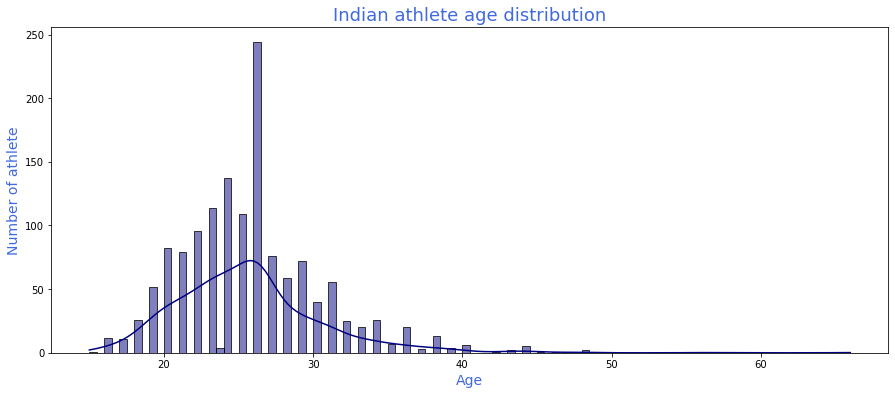

Age statistics of Indian athlete
count    1408.000000
mean       25.618221
std         4.935806
min        15.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        66.000000
Name: Age, dtype: float64


In [91]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(india['Age'] ,binwidth=.5,ax=ax,kde=True,color="navy")
ax.set_title('Indian athlete age distribution', size=18, color='royalblue')
ax.set_xlabel('Age', size=14, color='royalblue')
ax.set_ylabel('Number of athlete', size=14, color='royalblue')

plt.show()
print(f"Age statistics of Indian athlete\n{india['Age'].describe()}")

#### 10.3 Sports & Events participation:

In [92]:
summer_india=india[india['Season']=='Summer']
winter_india=india[india['Season']=='Winter']

In [93]:
games_india = pd.pivot_table(summer_india, index=['Games'],aggfunc=lambda x: len(x.unique())).reset_index()[['Games','Sport']]

In [94]:
games_india.rename(columns={'Games':'Summer Games','Sport':'Number of sports'})

,Summer Games,Number of sports
0,1900 Summer,1
1,1920 Summer,2
2,1924 Summer,2
3,1928 Summer,2
4,1932 Summer,3
5,1936 Summer,4
6,1948 Summer,10
7,1952 Summer,11
8,1956 Summer,8
9,1960 Summer,6


In [95]:
print(f"List of sports in summer games in which India participated\n\n{summer_india['Sport'].unique()}")

List of sports in summer games in which India participated

['Athletics' 'Table Tennis' 'Weightlifting' 'Judo' 'Water Polo'
 'Equestrianism' 'Football' 'Hockey' 'Tennis' 'Cycling' 'Wrestling' 'Golf'
 'Badminton' 'Swimming' 'Archery' 'Shooting' 'Sailing' 'Boxing' 'Rowing'
 'Gymnastics' 'Art Competitions' 'Basketball' 'Diving']


In [96]:
games1_india = pd.pivot_table(winter_india, index=['Games'],aggfunc=lambda x: len(x.unique())).reset_index()[['Games','Sport']]

In [97]:
games1_india.rename(columns={'Games':'Winter Games','Sport':'Number of sports'})

,Winter Games,Number of sports
0,1924 Winter,1
1,1964 Winter,1
2,1968 Winter,1
3,1988 Winter,1
4,1992 Winter,1
5,1998 Winter,1
6,2002 Winter,1
7,2006 Winter,3
8,2010 Winter,3
9,2014 Winter,2


In [98]:
print(f"List of sports in winter games in which India participated\n\n{winter_india['Sport'].unique()}")

List of sports in winter games in which India participated

['Alpine Skiing' 'Cross Country Skiing' 'Luge' 'Alpinism']


In [99]:
print('List of events in summer games in which India participated')
pd.DataFrame(summer_india['Event'].unique(),columns=['List of event'])

List of events in summer games in which India participated


,List of event
0,Athletics Men's 110 metres Hurdles
1,Athletics Men's 400 metres Hurdles
2,Athletics Women's 800 metres
3,Athletics Women's 4 x 400 metres Relay
4,Table Tennis Men's Singles
...,...
182,"Cycling Men's Individual Pursuit, 4,000 metres"
183,"Athletics Women's 10,000 metres"
184,Judo Women's Half-Heavyweight
185,Athletics Women's 400 metres Hurdles


In [100]:
print('List of events in winter games in which India participated')
pd.DataFrame(winter_india['Event'].unique(),columns=['List of event'])

List of events in winter games in which India participated


,List of event
0,Alpine Skiing Women's Giant Slalom
1,Alpine Skiing Women's Slalom
2,Alpine Skiing Men's Downhill
3,Alpine Skiing Men's Giant Slalom
4,Alpine Skiing Men's Slalom
5,Cross Country Skiing Men's Sprint
6,Cross Country Skiing Men's 15 kilometres
7,Luge Men's Singles
8,Alpinism Mixed Alpinism


#### 10.4 Medals

In [101]:
print(f"Medals won by Indian athlete at Summer Olympic:\n{medal_summer.loc['India']}")

Medals won by Indian athlete at Summer Olympic:
Gold Medal       9
Silver Medal     7
Bronze Medal    12
Total Medal     28
Name: India, dtype: int32


In [102]:
print(f"Medals won by Indian athlete at Winter Olympic:\n{medal_winter.loc['India']}")

Medals won by Indian athlete at Winter Olympic:
Gold Medal      1
Silver Medal    0
Bronze Medal    0
Total Medal     1
Name: India, dtype: int32


#### India Medal Tally

In [103]:
gold = pd.pivot_table(india[india.Medal=='Gold'], values='Event', index=['Games'],
                      columns=['region'], aggfunc=lambda x: len(x.unique()),fill_value=0)
silver=pd.pivot_table(india[india.Medal=='Silver'], values='Event', index=['Games'],
                      columns=['region'], aggfunc=lambda x: len(x.unique()),fill_value=0)
bronze=pd.pivot_table(india[india.Medal=='Bronze'], values='Event', index=['Games'],
                      columns=['region'], aggfunc=lambda x: len(x.unique()),fill_value=0)

In [104]:
gold=gold.rename(columns={'India':'Gold Medal'})
silver=silver.rename(columns={'India':'Silver Medal'})
bronze=bronze.rename(columns={'India':'Bronze Medal'})

In [105]:
india_medal=gold.merge(silver, on='Games',how='outer').merge(bronze,on='Games',how='outer')

In [106]:
india_medal=india_medal.fillna(0).astype(int)

In [107]:
india_medal['Total Medal']=india_medal['Gold Medal']+india_medal['Silver Medal']+india_medal['Bronze Medal']

In [108]:
india_medal

region,Gold Medal,Silver Medal,Bronze Medal,Total Medal
Games,,,,
1924 Winter,1,0,0,1
1928 Summer,1,0,0,1
1932 Summer,1,0,0,1
1936 Summer,1,0,0,1
1948 Summer,1,0,0,1
1952 Summer,1,0,1,2
1956 Summer,1,0,0,1
1964 Summer,1,0,0,1
1980 Summer,1,0,0,1


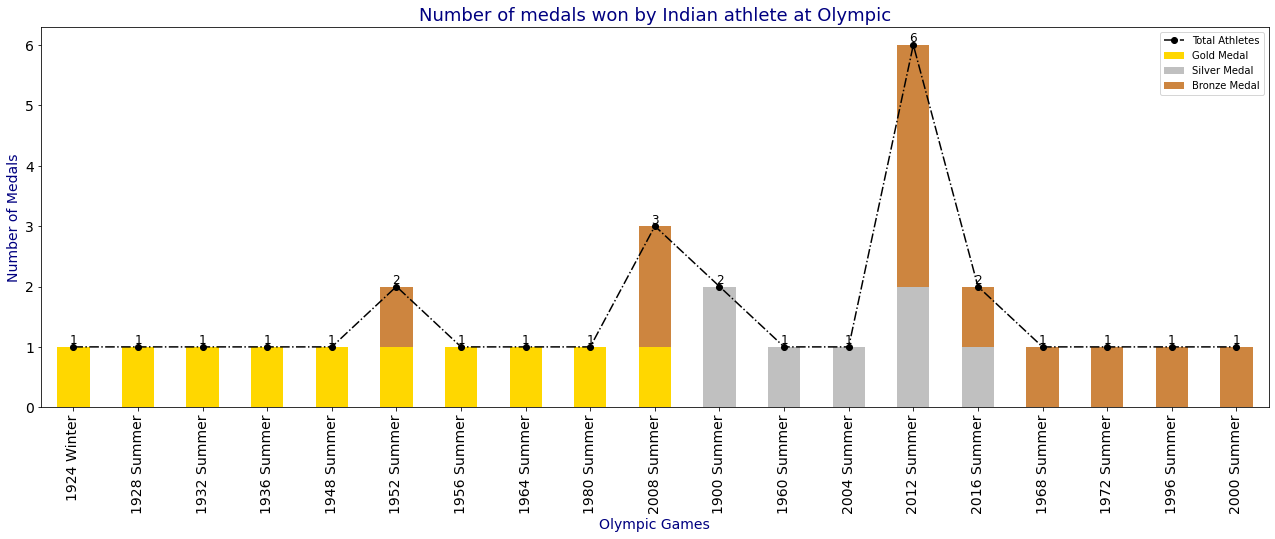

In [109]:
fig, ax = plt.subplots(figsize=(22,7))

india_medal[['Gold Medal','Silver Medal','Bronze Medal']].plot(kind='bar',
                                                               stacked=True,color=['gold', 'silver', 'peru'],ax=ax,fontsize=14)
ax.plot(india_medal.index.values, india_medal['Total Medal'], linestyle = '-.', color = 'black',
        label = 'Total Athletes',marker = 'o')

for i,j in zip(india_medal.index.values, india_medal['Total Medal']):
    ax.annotate(str(j),xy=(i,j), color='black',fontsize=12, ha='center', va='bottom')
    
ax.set_xlabel('Olympic Games', size=14, color='navy')
ax.set_ylabel('Number of Medals', size=14, color='navy')
ax.set_title('Number of medals won by Indian athlete at Olympic', size=18, color='navy')
ax.legend(loc = 'best',)

plt.show()

#### Medals By Male Athlete

In [110]:
male_india=india[india.Sex=='M']

In [111]:
gold_medal_male=male_india[male_india['Medal']=='Gold'].groupby('Name')['Medal'].count().reset_index().rename(columns={'Medal':'Gold Medal'})

In [112]:
gold_medal_male.sort_values(by='Gold Medal',ascending=False)

,Name,Gold Medal
60,Leslie Walter Claudius,3
83,Randhir Singh Gentle,3
84,Ranganathan Francis,3
28,Dhyan Chand Bais,3
88,Richard James Allen,3
...,...,...
35,"Gerald Rudolph ""Gerry"" Glackan",1
34,George Eric McCarthy Marthins,1
33,Frederick Stephen Seaman,1
32,Frank Gerald Singlehurst Brewin,1


In [113]:
total_medal=pd.pivot_table(male_india, values='Year', index=['Name'],columns=['Medal'], aggfunc=lambda x: len(x.unique()),fill_value=0)

In [114]:
print('List of Male athlete who won the medals:')
total_medal['Total']=total_medal['Bronze']+total_medal['Gold']+total_medal['Silver']
total_medal.sort_values(by='Total',ascending=False)

List of Male athlete who won the medals:


Medal,Bronze,Gold,Silver,Total
Name,,,,
Leslie Walter Claudius,0,3,1,4
Udham Singh Kular,0,3,1,4
Ranganathan Francis,0,3,0,3
"Victor John ""V. J."" Peter",1,1,1,3
Randhir Singh Gentle,0,3,0,3
...,...,...,...,...
Govinda Billimogaputtaswamy,1,0,0,1
Govind Rao Sawant,0,0,1,1
"Gerald Rudolph ""Gerry"" Glackan",0,1,0,1


#### Medals By Female Athlete
The first Indian woman to ever win an Olympic medal was **Karnam Malleswari**, who won a bronze medal at the *2000 Sydney* Olympics in the Women's 69 kg category in Weightlifting.

In [115]:
female_india=india[india.Sex=='F']

In [116]:
female_india[female_india['Medal']=='Gold'].groupby('Name')['Medal'].count().reset_index().rename(columns={'Medal':'Gold Medal'})

,Name,Gold Medal


**No Indian Female athlete won the Gold medal Yet.**

In [117]:
female_india[female_india['Medal'].notnull()].groupby('Name')['Medal'].count().reset_index().rename(columns={'Medal':'Total Medal'})

,Name,Total Medal
0,Karnam Malleswari,1
1,Mangte Chungneijang Mary Kom,1
2,"Pusarla Venkata ""P. V."" Sindhu",1
3,Saina Nehwal,1
4,Sakshi Malik,1


In [118]:
print('List of Female athlete who won the Medals:')
pd.pivot_table(female_india, values='Year', index=['Name'],columns=['Medal'], aggfunc=lambda x: len(x.unique()),fill_value=0)

List of Female athlete who won the Medals:


Medal,Bronze,Silver
Name,,
Karnam Malleswari,1,0
Mangte Chungneijang Mary Kom,1,0
"Pusarla Venkata ""P. V."" Sindhu",0,1
Saina Nehwal,1,0
Sakshi Malik,1,0


In [119]:
sport=pd.pivot_table(india, values='Year', index=['Sport'],columns=['Medal'], aggfunc=lambda x: len(x.unique()),fill_value=0)
sport

Medal,Bronze,Gold,Silver
Sport,,,
Alpinism,0,1,0
Athletics,0,0,1
Badminton,1,0,1
Boxing,2,0,0
Hockey,2,8,1
Shooting,1,1,2
Tennis,1,0,0
Weightlifting,1,0,0
Wrestling,4,0,1


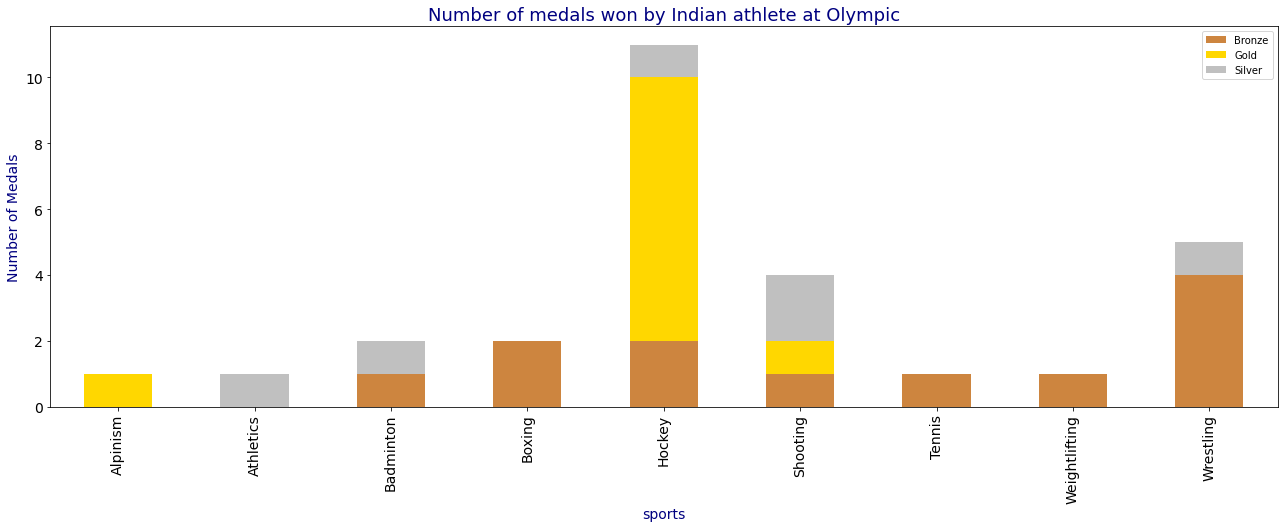

In [120]:
fig, ax = plt.subplots(figsize=(22,7))

sport.plot(kind='bar',stacked=True,color=['peru','gold', 'silver'],ax=ax,fontsize=14)
    
ax.set_xlabel('sports', size=14, color='navy')
ax.set_ylabel('Number of Medals', size=14, color='navy')
ax.set_title('Number of medals won by Indian athlete at Olympic', size=18, color='navy')
ax.legend(loc = 'best',)

plt.show()